## Diabetes Prediction
<!-- Author : Ashutosh Sahu(ashusahu198@gmail.com) -->

Dataset Source - [kaggle](https://www.kaggle.com/tigganeha4/diabetes-dataset-2019)

other references -
- https://www.sciencedirect.com/science/article/pii/S1877050920308024?via%3Dihub



## Data Dictionary
|S.no.| Parameters | Details |
|:-|:-|:-|
|1| Age | Age of the Patient (18 or above)|
|2| Gender | Male or Female |
|3| Family_Diabetes | Family history with diabetes (yes or no) |
|4| highBP | Diagnosed with high blood pressure (yes or no) |
|5| PhysicallyActive | walk/run or can be physically active |
|6| BMI | Body Mass Index |
|7| Smoking | Whether the person smokes or not (yes or no) |
|8| Alcohol | Alcohol consumer(yes or no)|
|9| Sleep | Hours of sleep |
|10| SoundSleep | Hours of sound sleep |
|11| RegularMedicine | Regular intake of medicine (yes or no) |
|12| JunkFood | Junk food consumer(yes or no)|
|13| Stress | how much stress taken |
|14| BPLevel | Hign/normal/low |
|15| Pregnancies | no. of Pregnancies |
|16| Pdiabetes | Gestation diabetes(yes or no) |
|17| UrinationFreq | Frequency of Urination (not much or quite much)|
|18| Diabetic | yes or no |

In [34]:
import pandas
df = pandas.read_csv('https://github.com/Dragsters/Nutrihelp/raw/main/server/ML/datasets/diabetes_dataset.csv')
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [25]:
df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
!pip install --upgrade pandas_profiling 

     |████████████████████████████████| 245kB 5.4MB/s 
     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 1.1MB 12.5MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 3.2MB 18.3MB/s 
     |████████████████████████████████| 296kB 38.1MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=5cd95ee87216f073a11e8e57ea6f69baffd619eeefb4190dece007f28df480ed
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=80057c43e447cfc1cee48a0c68b33689d83a3b4e2b59250cc4efa7992ea413f8
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but y

In [ ]:
from pandas_profiling import ProfileReport
df.profile_report()

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Handling Missing values

In [5]:
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [35]:
# for removing rows.
indexes = df[df['Diabetic'].isna() | df['Pdiabetes'].isna() | df['BMI'].isna()].index.to_list()

print(indexes)
df.drop(index= indexes,inplace = True)

[113, 116, 121, 122, 134]


In [36]:
# for imputing pregnancies
print(df['Pregancies'].value_counts())
df['Pregancies'].fillna(value = 0.0, inplace= True)
print(df['Pregancies'].value_counts())
df['Pregancies'] = df['Pregancies'].astype(int)
df['Pregancies']

0.0    750
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64
0.0    792
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64


0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    2
Name: Pregancies, Length: 947, dtype: int64

no     681
yes    265
 no      1
Name: Diabetic, dtype: int64
no     682
yes    265
Name: Diabetic, dtype: int64


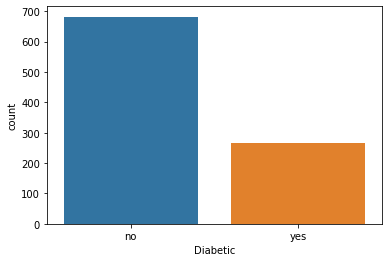

In [37]:

import seaborn
print(df['Diabetic'].value_counts())
df['Diabetic'].replace(' no', 'no', inplace=True)
print(df['Diabetic'].value_counts())
seaborn.countplot(x = 'Diabetic',data = df)

In [38]:
print(df['RegularMedicine'].value_counts())
df['RegularMedicine'].replace('o', 'no', inplace =True)
print(df['RegularMedicine'].value_counts())

no     611
yes    335
o        1
Name: RegularMedicine, dtype: int64
no     612
yes    335
Name: RegularMedicine, dtype: int64


In [39]:
print(df['Pdiabetes'].value_counts())
df['Pdiabetes'].replace('0', 'no', inplace = True)
print(df['Pdiabetes'].value_counts())


0      932
yes     14
no       1
Name: Pdiabetes, dtype: int64
no     933
yes     14
Name: Pdiabetes, dtype: int64


In [40]:
df.drop(columns = ['highBP'],inplace = True)
print(df['BPLevel'].value_counts().index)
df['BPLevel'].replace('High', 'high', inplace = True)
df['BPLevel'].replace('Low','low', inplace = True)
df['BPLevel'].replace('normal ', 'normal', inplace = True)
print(df['BPLevel'].value_counts().index)

Index(['normal', 'high', 'low', 'High', 'Low', 'normal '], dtype='object')
Index(['normal', 'high', 'low'], dtype='object')


### Numerical Variable Analysis

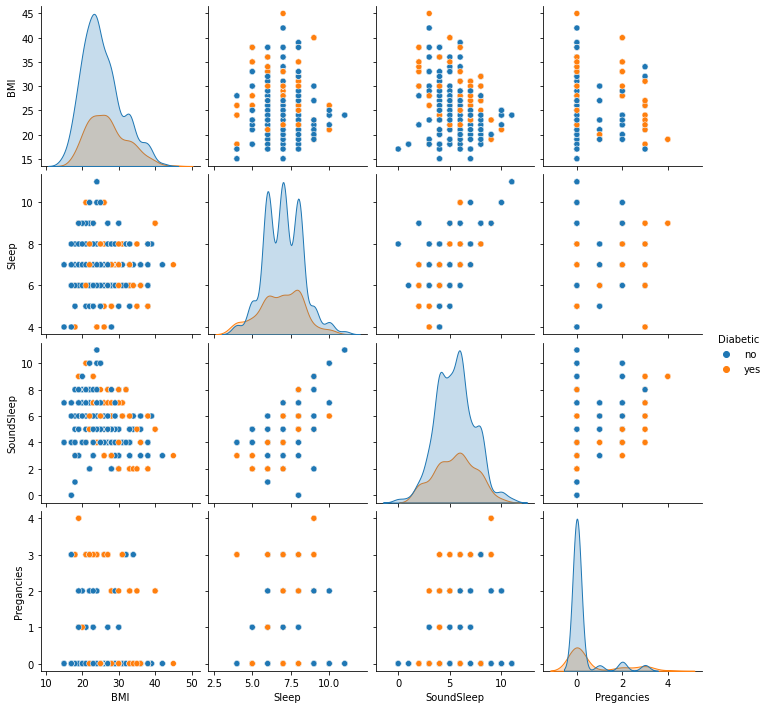

In [ ]:
import seaborn
seaborn.pairplot(data=df, hue='Diabetic')

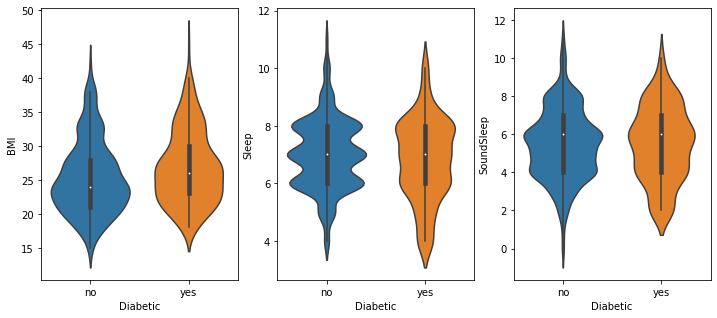

In [17]:
import matplotlib.pyplot as pyplot
import seaborn
fig = pyplot.figure(figsize= (12,5))
pyplot.subplot(131)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'BMI')
pyplot.subplot(132)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'Sleep')
pyplot.subplot(133)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'SoundSleep')

### Categorical Variable Analysis

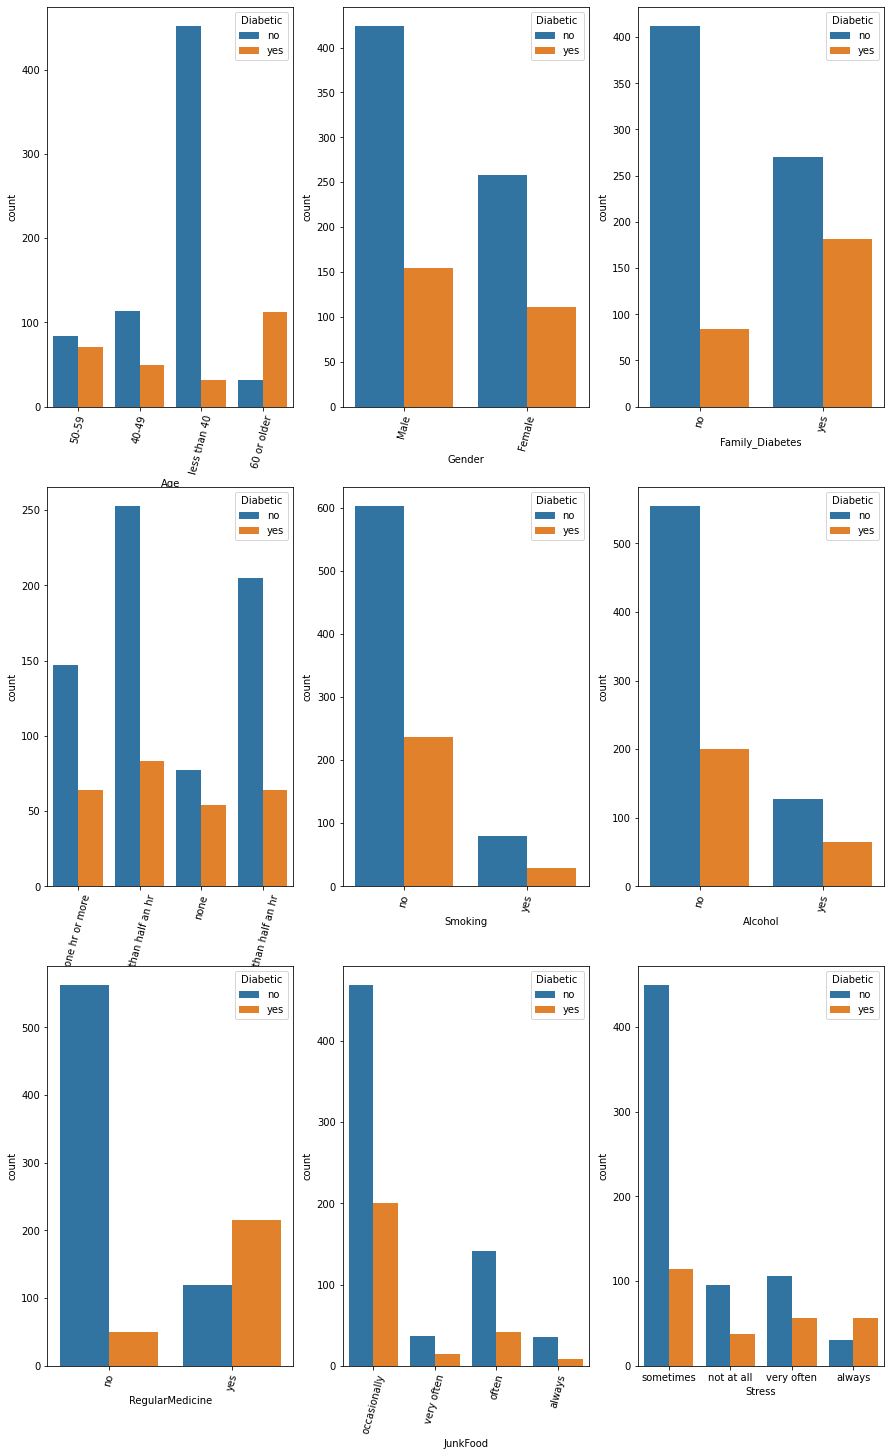

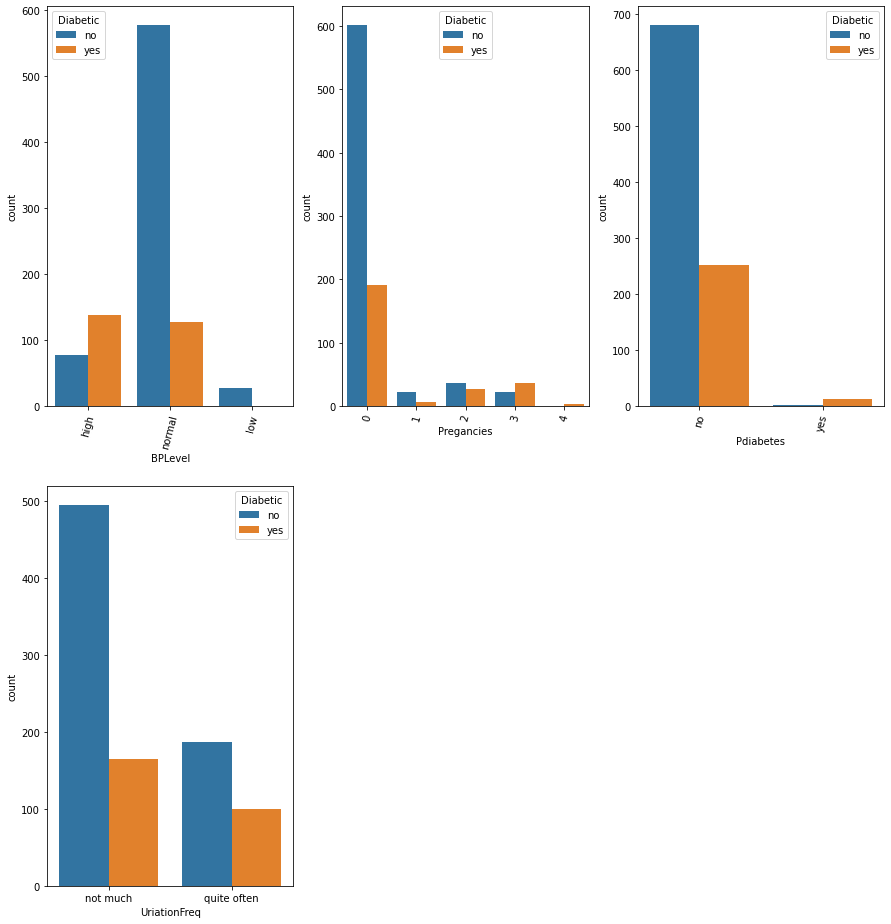

In [41]:

cols = ['Age', 'Gender', 'Family_Diabetes', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq']

pyplot.figure(figsize = (15,25))

i  = 0
for j in range(9):
    pyplot.xticks(rotation=75)
    pyplot.subplot(int(str(3)+str(3)+str(j+1)))
    seaborn.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1
pyplot.show()

pyplot.figure(figsize = (15,25))
for j in range(4):
    pyplot.xticks(rotation=75)
    pyplot.subplot(int(str(3)+str(3)+str(j+1)))
    seaborn.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1


### Encoding categorical data


In [42]:
df = pandas.get_dummies(df, drop_first= True)

preg = pandas.get_dummies(df['Pregancies'],prefix='Pregnancies',drop_first= True)

print(preg.head())

df = pandas.concat([preg,df], axis = 1)
df.drop(columns=['Pregancies'],inplace=True)

   Pregnancies_1  Pregnancies_2  Pregnancies_3  Pregnancies_4
0              0              0              0              0
1              0              0              0              0
2              0              0              0              0
3              0              0              0              0
4              0              0              0              0


In [43]:
df

,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,BMI,Sleep,SoundSleep,Age_50-59,Age_60 or older,Age_less than 40,Gender_Male,Family_Diabetes_yes,PhysicallyActive_more than half an hr,PhysicallyActive_none,PhysicallyActive_one hr or more,Smoking_yes,Alcohol_yes,RegularMedicine_yes,JunkFood_occasionally,JunkFood_often,JunkFood_very often,Stress_not at all,Stress_sometimes,Stress_very often,BPLevel_low,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often,Diabetic_yes
0,0,0,0,0,39.0,8,6,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,28.0,8,6,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
2,0,0,0,0,24.0,6,6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,23.0,8,6,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,27.0,8,8,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0,0,0,0,25.0,8,6,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
948,0,0,0,0,27.0,6,5,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1
949,0,0,0,0,23.0,6,5,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
950,0,0,0,0,27.0,6,5,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0


In [44]:
df.columns

Index(['Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4',
       'BMI', 'Sleep', 'SoundSleep', 'Age_50-59', 'Age_60 or older',
       'Age_less than 40', 'Gender_Male', 'Family_Diabetes_yes',
       'PhysicallyActive_more than half an hr', 'PhysicallyActive_none',
       'PhysicallyActive_one hr or more', 'Smoking_yes', 'Alcohol_yes',
       'RegularMedicine_yes', 'JunkFood_occasionally', 'JunkFood_often',
       'JunkFood_very often', 'Stress_not at all', 'Stress_sometimes',
       'Stress_very often', 'BPLevel_low', 'BPLevel_normal', 'Pdiabetes_yes',
       'UriationFreq_quite often', 'Diabetic_yes'],
      dtype='object')

### Scaling

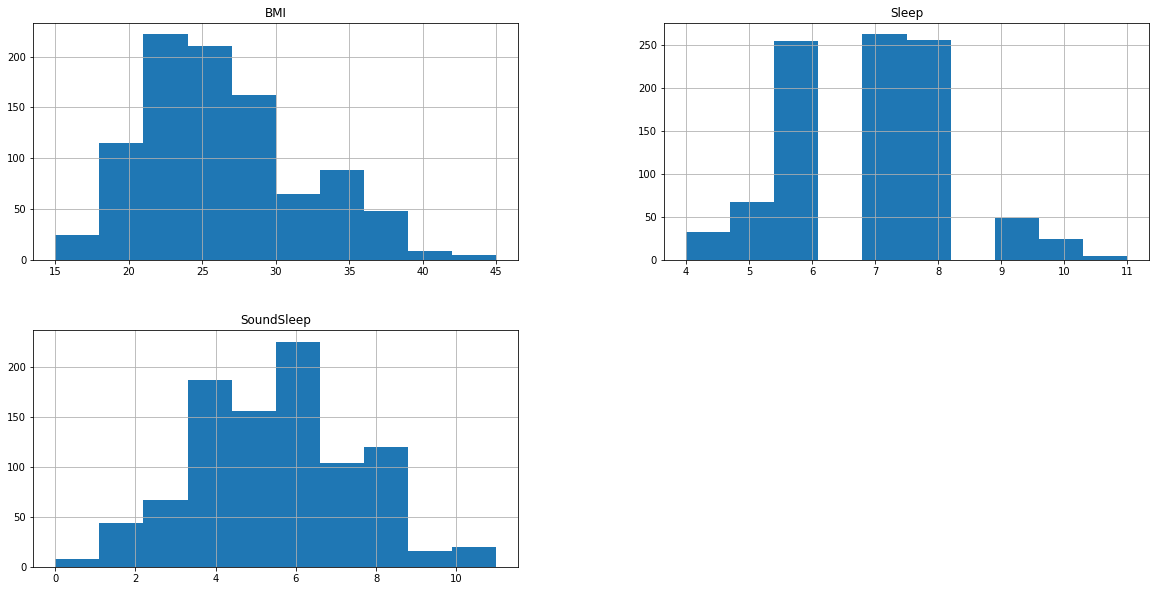

In [45]:
df[['BMI', 'Sleep','SoundSleep']].hist(figsize=(20,10))
pyplot.show()

Standardizing all features since they show a gaussian distribution.

In [46]:
standard_df = df.copy()
# y = standard_df['Diabetic_yes']
# x = standard_df.drop(columns = ['Diabetic_yes'])

from sklearn.preprocessing import StandardScaler
cols = ['BMI','Sleep','SoundSleep']
standard_df[cols] = StandardScaler().fit_transform(standard_df[cols].values)
standard_df


,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,BMI,Sleep,SoundSleep,Age_50-59,Age_60 or older,Age_less than 40,Gender_Male,Family_Diabetes_yes,PhysicallyActive_more than half an hr,PhysicallyActive_none,PhysicallyActive_one hr or more,Smoking_yes,Alcohol_yes,RegularMedicine_yes,JunkFood_occasionally,JunkFood_often,JunkFood_very often,Stress_not at all,Stress_sometimes,Stress_very often,BPLevel_low,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often,Diabetic_yes
0,0,0,0,0,2.450335,0.821693,0.268666,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0.413050,0.821693,0.268666,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
2,0,0,0,0,-0.327780,-0.748727,0.268666,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,-0.512988,0.821693,0.268666,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0.227843,0.821693,1.339936,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0,0,0,0,-0.142573,0.821693,0.268666,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
948,0,0,0,0,0.227843,-0.748727,-0.266969,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1
949,0,0,0,0,-0.512988,-0.748727,-0.266969,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
950,0,0,0,0,0.227843,-0.748727,-0.266969,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0


## Train Test Split

In [47]:
y = df['Diabetic_yes']
x = df.drop(columns= ['Diabetic_yes'])

stan_y = standard_df['Diabetic_yes']
stan_x = standard_df.drop(columns=['Diabetic_yes'])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

stan_x_train, stan_x_test, stan_y_train, stan_y_test = train_test_split(stan_x, stan_y, test_size = 0.25, random_state = 42)

### OverSampling
__ADASYN__ : ADASYN(Adaptive Synthetic) is a generalized form of the SMOTE algorithm. This algorithm aims to oversample the minority class by generating synthetic instances for it. It considers the density distribution, which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is better than SMOTE.

In [48]:
# oversampling using adasyn
cols = x_train.columns

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state = 42)
stan_x_train, stan_y_train = ada.fit_resample(stan_x_train,stan_y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [49]:
import numpy
print(numpy.unique(y_train,return_counts= True))
print(numpy.unique(stan_y_train,return_counts=True))

(array([0, 1], dtype=uint8), array([518, 192]))
(array([0, 1], dtype=uint8), array([518, 527]))


## Training Models

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report

In [51]:
models = [
    LogisticRegression(random_state = 42, max_iter = 1000),
    SGDClassifier(random_state = 42),
    GaussianNB(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    SVC(random_state = 42, probability = True,verbose = 2),
    DecisionTreeClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42),
    GradientBoostingClassifier(random_state = 42),
    LGBMClassifier(random_state = 42)
]

parameters = [
    ['logreg_params' , {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                        'C': numpy.logspace(0,4,32),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'max_iter' : numpy.linspace(50,300),
                        'multi_class': ['auto', 'ovr', 'multinomial'],
                        'l1_ratio' : numpy.linspace(0,1,8),
                        }],
    ['sgdc_params' , {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron','squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
                      'penalty' : ['l2', 'l1', 'elasticnet'],
                      'alpha' : numpy.linspace(0.0001,0.1,100),
                      'l1_ratio' : numpy.linspace(0,1,50),
                      'learning_rate' : ['constant', 'optimal','invscaling','adaptive'],
                      'eta0' : numpy.linspace(0.0001, 0.05, 50),
                      'power_t' : numpy.linspace(0,1, 10),
                      'average' :[True, False]
                      }],
    ['gnb_params' , {}],
    ['knn_params' , {'n_neighbors': list(range(1,50)),
                     'weights':['uniform', 'distance'],
                     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                     'leaf_size' : list(range(1,100)),
                     'p' :[1,2,3],
                     'metric' : ['euclidean','manhattan','chebyshev','minkowski','seuclidean','mahalanobis']
                     }],
    ['lda_params' , {'solver' : ['svd', 'lsqr', 'eigen'],
                     'shrinkage' : ['auto',0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                     'store_covariance' :[True,False]

                     }],
    ['svc_params' , {'C': range(25,35,2),
                     'degree' : list(range(1,6)),
                     'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                     'gamma':['scale', 'auto', 0.001, 0.01, 0.1, 1],
                     'shrinking' :[True,False],
                     'decision_function_shape': ['ovo', 'ovr'],
                     }],
    ['dt_params' , {'criterion': ['gini', 'entropy'],
                    'splitter' :['best','random'],
                    'max_depth' : range(1,20),
                    'min_samples_split' : range(2,500,10),
                    'min_samples_leaf' : range(1,6),
                    'max_features' : ['auto', 'log2', None]
                    }],
    ['rf_params' , {'n_estimators' : list(range(10,300,10)),
                    'criterion' : ['gini', 'entropy'],
                    'min_samples_split' : list(range(2,20)),
                    'min_samples_leaf' : list(range(1,20)),
                    'max_features' :['auto','log2',None],
                    'max_leaf_nodes' :list(range(1,20)),
                    'bootstrap' :[True,False],
                    'oob_score' : [True,False]
                    }],
    ['gbc_params' , {'loss' :['deviance', 'exponential'],
                     'learning_rate' : [0.05,0.1,0.2,0.3,0.4,0.5],
                     'n_estimators' :[100,150,200],
                     'min_samples_split' : [2,3,5,7,8,10],
                     'criterion' : ['friedman_mse', 'mse'],
                     'subsample' : [0.2,0.4,0.6,0.8,1.0],
                     'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
                     'max_features' :['auto','log2',None]
                    }],
    ['lgbmc_params' , {'boosting_type' : ['gbdt','dart', 'goss','rf'],
                       'num_leaves' : range(2,130,5),
                       'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
                       'n_estimators' :[100,150,200],
                       'reg_alpha' : [0.1,0.2,0.3,0.4,0.5],
                       'reg_lambda' : [0.1,0.2,0.3,0.4,0.5]
                       }]
]

#### Over Ordinary data

In [53]:

accuracy = []
          
for i in range(len(models)):
    clf = RandomizedSearchCV(models[i],
                       param_distributions= parameters[i][1],
                       cv = StratifiedKFold(n_splits = 5),
                       scoring = "accuracy",
                       n_jobs = -1, verbose = 2)
    
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)
    accuracy.append(clf.best_score_ * 100)
    print()
    print('best_estimator :', clf.best_estimator_)
    
    print('train report : \n',classification_report(y_train, y_train_pred))
    print('test_report : \n',classification_report(y_test,y_pred))
    print("---------------------------------------------------------------------------")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1.0,
                   max_iter=172.44897959183675, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
train report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       518
           1       0.85      0.82      0.83       192

    accuracy                           0.91       710
   macro avg       0.89      0.88      0.89       710
weighted avg       0.91      0.91      0.91       710

test_report : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       164
           1       0.78      0.79      0.79        73

    accuracy                           0.87       237
   macro avg       0.85      0.85      0.85       237
weighted

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : SGDClassifier(alpha=0.04752727272727273, average=True, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.031669387755102044,
              fit_intercept=True, l1_ratio=0.8775510204081632,
              learning_rate='adaptive', loss='squared_hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=1.0, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train report : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       518
           1       0.86      0.75      0.80       192

    accuracy                           0.90       710
   macro avg       0.88      0.85      0.87       710
weighted avg       0.90      0.90      0.90       710

test_report : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       164
           1     

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : KNeighborsClassifier(algorithm='brute', leaf_size=93, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=42, p=1,
                     weights='distance')
train report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       518
           1       0.99      0.93      0.96       192

    accuracy                           0.98       710
   macro avg       0.98      0.96      0.97       710
weighted avg       0.98      0.98      0.98       710

test_report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       164
           1       0.95      0.85      0.90        73

    accuracy                           0.94       237
   macro avg       0.94      0.92      0.93       237
weighted avg       0.94      0.94      0.94       237

---------------------------------------------------------------------------
Fitting 5 folds for each of 1

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)
train report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       518
           1       0.83      0.81      0.82       192

    accuracy                           0.90       710
   macro avg       0.88      0.87      0.88       710
weighted avg       0.90      0.90      0.90       710

test_report : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       164
           1       0.79      0.81      0.80        73

    accuracy                           0.87       237
   macro avg       0.85      0.86      0.85       237
weighted avg       0.87      0.87      0.87       237

---------------------------------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LibSVM]
best_estimator : SVC(C=25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=4, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=42, shrinking=False, tol=0.001, verbose=2)
train report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       518
           1       0.99      0.93      0.96       192

    accuracy                           0.98       710
   macro avg       0.98      0.96      0.97       710
weighted avg       0.98      0.98      0.98       710

test_report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       164
           1       0.95      0.86      0.91        73

    accuracy                           0.95       237
   macro avg       0.95      0.92      0.93       237
weighted avg       0.95      0.95      0.94       237

------------------------------------------------------

[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=22,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
train report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       518
           1       0.89      0.78      0.83       192

    accuracy                           0.92       710
   macro avg       0.91      0.87      0.89       710
weighted avg       0.91      0.92      0.91       710

test_report : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       164
           1       0.79      0.77      0.78        73

    accuracy                    

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished



best_estimator : RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=11, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
train report : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       518
           1       0.88      0.76      0.81       192

    accuracy                           0.91       710
   macro avg       0.90      0.86      0.87       710
weighted avg       0.90      0.91      0.90       710

test_report : 
               precision    recall  f1-score   support

           0       0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='exponential', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=9, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.4, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
train report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       518
           1       0.95      0.95      0.95       192

    accuracy                           0.97       710
   macro avg       0.97      0.97      0.97    

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


          accuracy
log_reg  90.281690
sgdc     89.436620
gnb      84.225352
knn      95.070423
lda      89.859155
svc      95.633803
dt       88.873239
rf       88.450704
gbc      95.633803
lgbmc    95.633803


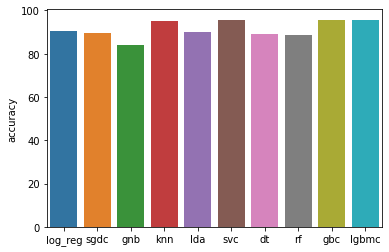

In [54]:
model_names = ['log_reg', 'sgdc','gnb','knn','lda','svc','dt','rf','gbc','lgbmc']
a = pandas.DataFrame(accuracy, columns = ['accuracy'], index = model_names)
print(a)
seaborn.barplot(data = a, y = 'accuracy', x = a.index)

#### Over standardized Data

In [56]:
accuracy = []
    
for i in range(len(models)):
    
    clf = RandomizedSearchCV(models[i],
                       param_distributions= parameters[i][1],
                       cv = StratifiedKFold(n_splits = 5),
                       scoring = "accuracy",
                       n_jobs = -1, verbose = 2)
    
    clf.fit(stan_x_train, stan_y_train)
    y_pred = clf.predict(stan_x_test)
    y_train_pred = clf.predict(stan_x_train)
    accuracy.append(clf.best_score_ * 100)
    
    print()
    print('best_estimator :', clf.best_estimator_)
    
    print('train report : \n',classification_report(stan_y_train, y_train_pred))
    print('test_report : \n',classification_report(stan_y_test,y_pred))
    print("---------------------------------------------------------------------------")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : LogisticRegression(C=5.945570708544391, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1,
                   l1_ratio=0.5714285714285714, max_iter=274.48979591836735,
                   multi_class='ovr', n_jobs=None, penalty='none',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
train report : 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       518
           1       0.87      0.93      0.90       527

    accuracy                           0.89      1045
   macro avg       0.89      0.89      0.89      1045
weighted avg       0.89      0.89      0.89      1045

test_report : 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       164
           1       0.70      0.85      0.77        73

    accuracy                           0.84       237
   macro avg 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : SGDClassifier(alpha=0.01019090909090909, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.015375510204081632,
              fit_intercept=True, l1_ratio=0.0, learning_rate='adaptive',
              loss='squared_epsilon_insensitive', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=1.0,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
train report : 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       518
           1       0.85      0.91      0.88       527

    accuracy                           0.87      1045
   macro avg       0.87      0.87      0.87      1045
weighted avg       0.87      0.87      0.87      1045

test_report : 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       164
           1       0.71  

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : KNeighborsClassifier(algorithm='brute', leaf_size=12, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='distance')
train report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       518
           1       0.99      0.98      0.99       527

    accuracy                           0.99      1045
   macro avg       0.99      0.99      0.99      1045
weighted avg       0.99      0.99      0.99      1045

test_report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       164
           1       0.96      0.89      0.92        73

    accuracy                           0.95       237
   macro avg       0.95      0.94      0.94       237
weighted avg       0.95      0.95      0.95       237

---------------------------------------------------------------------------
Fitting 5 folds for each of 1

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.1,
                           solver='eigen', store_covariance=False, tol=0.0001)
train report : 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       518
           1       0.83      0.90      0.86       527

    accuracy                           0.86      1045
   macro avg       0.86      0.86      0.86      1045
weighted avg       0.86      0.86      0.86      1045

test_report : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       164
           1       0.72      0.95      0.82        73

    accuracy                           0.87       237
   macro avg       0.85      0.89      0.86       237
weighted avg       0.89      0.87      0.87       237

---------------------------------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LibSVM]
best_estimator : SVC(C=25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=2, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=2)
train report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       518
           1       0.96      0.99      0.98       527

    accuracy                           0.98      1045
   macro avg       0.98      0.97      0.98      1045
weighted avg       0.98      0.98      0.98      1045

test_report : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       164
           1       0.85      0.93      0.89        73

    accuracy                           0.93       237
   macro avg       0.91      0.93      0.92       237
weighted avg       0.93      0.93      0.93       237

-------------------------------------------------

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



best_estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')
train report : 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       518
           1       0.84      0.91      0.87       527

    accuracy                           0.87      1045
   macro avg       0.87      0.87      0.87      1045
weighted avg       0.87      0.87      0.87      1045

test_report : 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       164
           1       0.68      0.92      0.78        73

    accuracy               

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.5s finished



best_estimator : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=13, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)
train report : 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       518
           1       0.92      0.94      0.93       527

    accuracy                           0.93      1045
   macro avg       0.93      0.93      0.93      1045
weighted avg       0.93      0.93      0.93      1045

test_report : 
               precision    recall  f1-score   support

           0       0.9

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.5s finished



best_estimator : GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
train report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       518
           1       0.99      0.98      0.98       527

    accuracy                           0.98      1045
   macro avg       0.98      0.98      0.98      1045
weigh

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished



best_estimator : LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=37, objective=None,
               random_state=42, reg_alpha=0.3, reg_lambda=0.3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
train report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       518
           1       0.99      0.98      0.98       527

    accuracy                           0.98      1045
   macro avg       0.98      0.98      0.98      1045
weighted avg       0.98      0.98      0.98      1045

test_report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       164
           1       0.93      0.92      0.92        73

 

          accuracy
log_reg  87.846890
sgdc     86.507177
gnb      78.277512
knn      96.842105
lda      85.741627
svc      95.980861
dt       87.177033
rf       90.430622
gbc      96.363636
lgbmc    96.746411


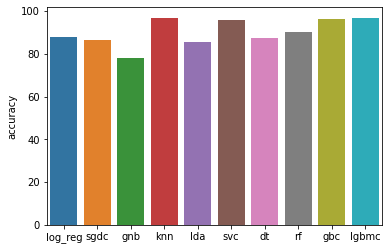

In [57]:
model_names = ['log_reg', 'sgdc','gnb','knn','lda','svc','dt','rf','gbc','lgbmc']
a = pandas.DataFrame(accuracy, columns = ['accuracy'], index = model_names)
print(a)
seaborn.barplot(data = a, y = 'accuracy', x = a.index)

#### Fine Tuning Best Estimator - KNN on scaled data.


In [66]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = numpy.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

parameters = {  'n_neighbors': list(range(5,40)),
                'weights':['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : list(range(1,100)),
                'p' :[1,3],
                'metric' : ['euclidean','manhattan']
            }
          
clf = RandomizedSearchCV(KNeighborsClassifier(),
                    param_distributions= parameters,
                    cv = StratifiedKFold(n_splits = 5),
                    scoring = "accuracy",
                    n_jobs = -1, verbose = 2)

clf.fit(stan_x_train,stan_y_train)
report(clf.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model with rank: 1
Mean validation score: 0.968 (std: 0.022)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 12, 'metric': 'euclidean', 'leaf_size': 40, 'algorithm': 'ball_tree'}

Model with rank: 1
Mean validation score: 0.968 (std: 0.023)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 29, 'metric': 'euclidean', 'leaf_size': 27, 'algorithm': 'ball_tree'}

Model with rank: 3
Mean validation score: 0.967 (std: 0.019)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 38, 'metric': 'manhattan', 'leaf_size': 36, 'algorithm': 'auto'}

Model with rank: 3
Mean validation score: 0.967 (std: 0.022)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 27, 'metric': 'euclidean', 'leaf_size': 36, 'algorithm': 'auto'}



[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


### Final KNN model

In [67]:
params = {'weights': 'distance', 'p': 1, 'n_neighbors': 12, 'metric': 'euclidean', 'leaf_size': 40, 'algorithm': 'ball_tree'}
clf = KNeighborsClassifier(**params)
clf.fit(stan_x_train, stan_y_train)
y_pred = clf.predict(stan_x_train)
print('train report\n',classification_report(stan_y_train,y_pred))
y_pred = clf.predict(stan_x_test)
print('test report\n',classification_report(stan_y_test,y_pred))

train report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       518
           1       0.99      0.98      0.99       527

    accuracy                           0.99      1045
   macro avg       0.99      0.99      0.99      1045
weighted avg       0.99      0.99      0.99      1045

test report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       164
           1       0.96      0.95      0.95        73

    accuracy                           0.97       237
   macro avg       0.97      0.96      0.97       237
weighted avg       0.97      0.97      0.97       237



#### Confusion Matrix - KNN model

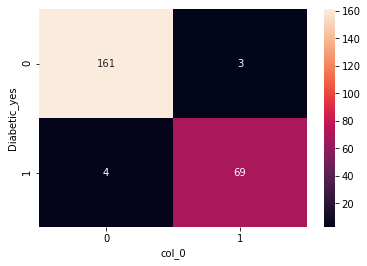

In [68]:
conf_matrix  = pandas.crosstab(y_test, y_pred)
seaborn.heatmap(conf_matrix,annot=True, fmt='.0f')

In [71]:
len(df.columns)

Index(['Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4',
       'BMI', 'Sleep', 'SoundSleep', 'Age_50-59', 'Age_60 or older',
       'Age_less than 40', 'Gender_Male', 'Family_Diabetes_yes',
       'PhysicallyActive_more than half an hr', 'PhysicallyActive_none',
       'PhysicallyActive_one hr or more', 'Smoking_yes', 'Alcohol_yes',
       'RegularMedicine_yes', 'JunkFood_occasionally', 'JunkFood_often',
       'JunkFood_very often', 'Stress_not at all', 'Stress_sometimes',
       'Stress_very often', 'BPLevel_low', 'BPLevel_normal', 'Pdiabetes_yes',
       'UriationFreq_quite often', 'Diabetic_yes'],
      dtype='object')

## Neural Network Hyperparameter random search

In [72]:
# gridsearch cross validation in neural network model

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = numpy.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

def nn_model(activation = 'relu', neurons = 32, optimizer = 'Adam',dropout = 0.1, init_mode = 'uniform'):
    model = Sequential()
    model.add(Dense(32, input_dim = 28, kernel_initializer = init_mode, activation= activation))
    model.add(Dense((neurons*2)//3, kernel_initializer = init_mode,activation= activation))
    model.add(Dense((neurons*4)//9,kernel_initializer = init_mode,  activation = activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer = init_mode, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

# Defining grid parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'selu', 'elu', 'tanh','sigmoid', 'linear']
neurons = range(31,39)
dropout = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ['SGD', 'Adam', 'Adamax','RMSprop','Adagrad','Adadelta','Nadam','Ftrl']
batch_size = range(10,101,10)
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer, dropout = dropout, init_mode = init_mode, batch_size = batch_size)

clf = KerasClassifier(build_fn= nn_model, epochs= 10, verbose= 1)

model = RandomizedSearchCV(estimator= clf, param_distributions = param_grid, n_jobs=-1,verbose = 9)
model.fit(stan_x_train,stan_y_train)

report(model.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.1s finished


Epoch 1/10
35/35 [==============================] - 1s 1ms/step - loss: 0.7051 - accuracy: 0.5483
Epoch 2/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.6828
Epoch 3/10
35/35 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7850
Epoch 4/10
35/35 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8325
Epoch 5/10
35/35 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8617
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8805
Epoch 7/10
35/35 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8869
Epoch 8/10
35/35 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.8997
Epoch 9/10
35/35 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.9050
Epoch 10/10
35/35 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.9068
Model with rank: 1


In [73]:
activation = ['softsign', 'tanh']
neurons = range(30,40)
dropout = [0.25, 0.3,0.35,0.4,0.45]
init_mode = ['normal','he_normal']
optimizer = [ 'RMSprop','Nadam']
batch_size = range(10,60,5)
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer, dropout = dropout, init_mode = init_mode, batch_size = batch_size)

clf = KerasClassifier(build_fn= nn_model, epochs= 10, verbose= 1)

model = RandomizedSearchCV(estimator= clf, param_distributions = param_grid, n_jobs=-1,verbose = 3)
model.fit(stan_x_train,stan_y_train)

report(model.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.9s finished


Epoch 1/10
105/105 [==============================] - 1s 1ms/step - loss: 0.6662 - accuracy: 0.6800
Epoch 2/10
105/105 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8523
Epoch 3/10
105/105 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8921
Epoch 4/10
105/105 [==============================] - 0s 1ms/step - loss: 0.3049 - accuracy: 0.8831
Epoch 5/10
105/105 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9131
Epoch 6/10
105/105 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.9081
Epoch 7/10
105/105 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.9198
Epoch 8/10
105/105 [==============================] - 0s 1ms/step - loss: 0.2724 - accuracy: 0.9123
Epoch 9/10
105/105 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.9166
Epoch 10/10
105/105 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.9242

### Final Neural Network

In [75]:
model = nn_model(optimizer='Nadam', neurons = 37, init_mode='normal', dropout=0.25, activation='softsign') 
model.fit(stan_x_train, stan_y_train, batch_size = 40, epochs = 80)

Epoch 1/80
27/27 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5621
Epoch 2/80
27/27 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.7840
Epoch 3/80
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.8370
Epoch 4/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8664
Epoch 5/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8854
Epoch 6/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8955
Epoch 7/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.9019
Epoch 8/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8949
Epoch 9/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.9000
Epoch 10/80
27/27 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.9148
Epoch 11/80
27/27 [

In [76]:
y_pred = model.predict_classes(stan_x_train)
print('train report\n', classification_report(stan_y_train, y_pred))

y_pred = model.predict_classes(stan_x_test)
print('test report\n', classification_report(stan_y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


train report
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       518
           1       0.93      0.96      0.94       527

    accuracy                           0.94      1045
   macro avg       0.94      0.94      0.94      1045
weighted avg       0.94      0.94      0.94      1045

test report
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       164
           1       0.78      0.88      0.83        73

    accuracy                           0.89       237
   macro avg       0.86      0.88      0.87       237
weighted avg       0.89      0.89      0.89       237



#### Confusion Matrix - Neural Network

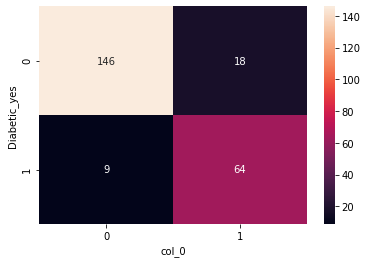

In [77]:
conf_matrix  = pandas.crosstab(stan_y_test, y_pred.ravel())
seaborn.heatmap(conf_matrix,annot=True, fmt='.0f')


## Conclusions:
KNeighbours Model perfoms better than Neural Network

In [79]:
import pickle


In [80]:

# save the model to disk
filename = 'diabetes_model.pickle'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

